<a href="https://colab.research.google.com/github/nataliachabaeva/lab/blob/dev/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22lab_work_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [5]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [2]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [3]:
data['pages']

1

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [7]:
import time
def get_vacancy_count(keyword):
    url = 'https://api.hh.ru/vacancies'
    params = {'text': keyword, 'per_page': 100, 'area': 1,}
    time.sleep(0.1)
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        return 0

a = ['Data Scientist', 'c++ developer', 'тестировщик', 'python developer', 'сварщик']
data = {}
for keyword in a:
    data[keyword] = get_vacancy_count(keyword)

(1 балл) Посчитайте сколько всего найдено вакансий:

In [8]:
ans  = 0
for keyword in a:
    count = data[keyword]['found']
    ans += count
    print(f"Количество вакансий для {keyword}: {count}")
print('всего доступно вакансий:', ans)

Количество вакансий для Data Scientist: 267
Количество вакансий для c++ developer: 1471
Количество вакансий для тестировщик: 1803
Количество вакансий для python developer: 4253
Количество вакансий для сварщик: 527
всего доступно вакансий: 8321


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [89]:
class Company:
    def __init__(self, company_name, latitude, longitude):
        self.company_name = company_name
        self.latitude = latitude
        self.longitude = longitude

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
for company in companies:
    print(f"Имя компании: {company.company_name}")
    print(f"Широта: {company.latitude}")
    print(f"Долгота: {company.longitude}")
    print()

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
# your code here

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
# your code here

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

In [ ]:
# your code here

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [ ]:
# your code here

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [10]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 62.1MB/s]


Создадим DataFrame:

In [11]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [12]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [13]:
diamonds.shape[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [14]:
#если нужна нумерация с единицы, то нужно к номрам прибавить 1
max_value = diamonds['total_sales_price'].max()
min_value = diamonds['total_sales_price'].min()

max_index = diamonds[diamonds['total_sales_price'] == max_value].index[0]
min_index = diamonds[diamonds['total_sales_price'] == min_value].index[0]
print ("min, number:", min_index, "price:", min_value)
print ("max, number:", max_index, "price:", max_value)

min, number: 0 price: 200
max, number: 219702 price: 1449881


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [15]:
value_to_count = 'unknown'
num_cells = (diamonds == value_to_count).sum().sum()
value_to_count = 'None'
num_cells += (diamonds == value_to_count).sum().sum()
num_cells

1891168

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [16]:
value1 = 'unknown'
value2 = 'None'
columns_with_value = diamonds.columns[diamonds.isin([value1, value2]).any()].tolist()
for x in columns_with_value:
  print(x)

color
cut_quality
eye_clean
culet_size
culet_condition
girdle_min
girdle_max
fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [17]:
matching_columns = [col for col in diamonds.columns if col.startswith('fancy_color_') or col.startswith('fluor_')]
num_matching_columns = len(matching_columns)
print("Количество столбцов, начинающихся с 'fancy_color_' или 'fluor_':", num_matching_columns)

Количество столбцов, начинающихся с 'fancy_color_' или 'fluor_': 6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [18]:
num_informative_values = diamonds[matching_columns].apply(lambda col: col[(col !=None) & (col != 'unknown')]).count()
num_informative_values

fluor_color                     15726
fluor_intensity                219575
fancy_color_dominant_color       9164
fancy_color_secondary_color      1062
fancy_color_overtone             2038
fancy_color_intensity            9162
dtype: int64

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [19]:
diamonds = diamonds.drop(columns=matching_columns)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [20]:
matching_columns = [col for col in diamonds.columns if col.startswith('culet_')]
num_matching_columns = len(matching_columns)
print("Количество столбцов, начинающихся с 'culet_':", num_matching_columns)
num_informative_values = diamonds[matching_columns].apply(lambda col: col[(col !=None) & (col != 'unknown')]).count()
print(*num_informative_values)
diamonds = diamonds.drop(columns=matching_columns)

Количество столбцов, начинающихся с 'culet_': 2
133963 15319


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [21]:
column_to_sum = 'total_sales_price'
sum_by_column = diamonds[column_to_sum].sum()
sum_by_column /= 1000
sum_by_column

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [22]:
even_index_rows = diamonds.iloc[::2]
even_index_rows

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [23]:
even_index_rows = diamonds.iloc[::6]
even_index_rows

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [24]:
categorical_columns = diamonds.select_dtypes(include='object')
categorical_columns

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [25]:
#матрица получается очень большая, у меня комп не тянет таокое, поэтому я оставила 1000*1000 первых строк и столбцов
col1 = diamonds['total_sales_price']
col1_transposed = col1.values.reshape(-1, 1)
max_rows = 1000
max_cols = 1000
result_matrix = np.dot(col1.values[:max_rows].reshape(-1, 1), col1_transposed[:max_cols].T)

result_matrix

array([[ 40000,  40000,  40000, ...,  84000,  84000,  84000],
       [ 40000,  40000,  40000, ...,  84000,  84000,  84000],
       [ 40000,  40000,  40000, ...,  84000,  84000,  84000],
       ...,
       [ 84000,  84000,  84000, ..., 176400, 176400, 176400],
       [ 84000,  84000,  84000, ..., 176400, 176400, 176400],
       [ 84000,  84000,  84000, ..., 176400, 176400, 176400]])

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

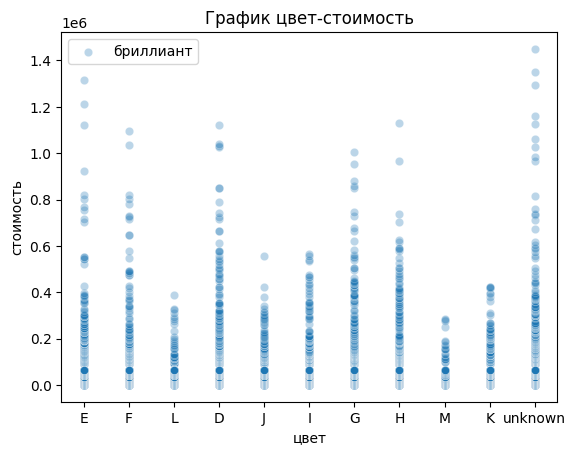

In [86]:
sns.scatterplot(x='color', y='total_sales_price', data=diamonds, label='бриллиант', alpha=0.3)
plt.xlabel('цвет')
plt.ylabel('стоимость')
plt.title('График цвет-стоимость')
plt.legend()
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

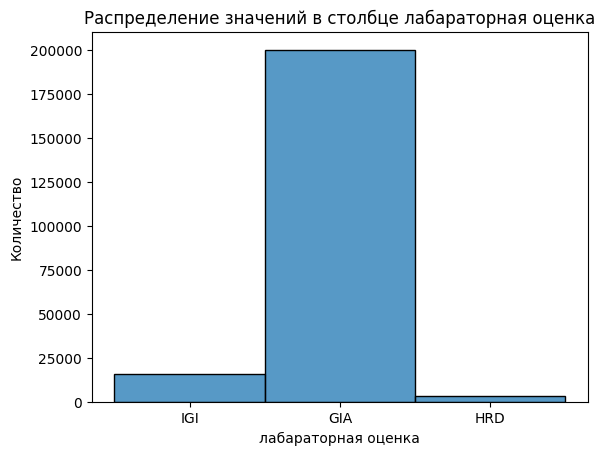

In [29]:
#это гистограмма, поэтому не очень понимаю что писать в лэйбле
sns.histplot(data=diamonds, x='lab')
plt.xlabel('лабараторная оценка')
plt.ylabel('Количество')
plt.title('Распределение значений в столбце лабараторная оценка')

plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

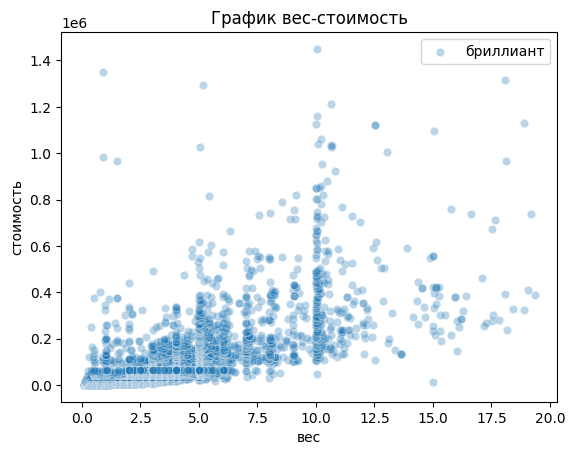

In [85]:
Q1 = diamonds['carat_weight'].quantile(0.7)
Q3 = diamonds['total_sales_price'].quantile(0.9)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация выбросов
filtered_df = diamonds[(diamonds['carat_weight'] >= lower_bound) & (diamonds['carat_weight'] <= upper_bound)]

# Построение графика без выбросов
sns.scatterplot(x='carat_weight', y='total_sales_price', data=filtered_df, label = 'бриллиант', alpha=0.3)
plt.xlabel('вес')
plt.ylabel('стоимость')
plt.title('График вес-стоимость')
plt.legend()
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

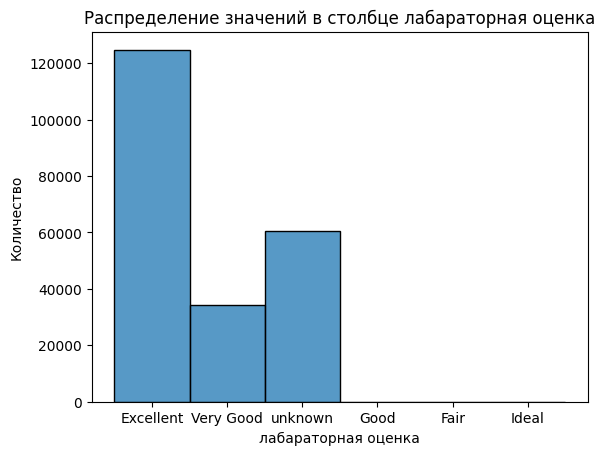

In [87]:
#это гистограмма, поэтому не очень понимаю что писать в лэйбле

sns.histplot(data=diamonds, x='cut_quality')
plt.xlabel('лабараторная оценка')
plt.ylabel('Количество')
plt.title('Распределение значений в столбце лабараторная оценка')
#plt.figure(figsize=(5000, 5000))
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

По графику цвет-цена видно, что для каждого цвета количество бриллиантов уменьшается с ростом цены.
По графику оценка-количество видно, что оценка GIA встречается гораздо чаще остальных двух.
На графике вес-цена наблюдается прямо-пропорцианльная зависимость, но с большим количством выбросов.
По графику лаб-оценка-количество видно, что оценки good,fair,ideal почти не используются, а также достаточно много бриллиантов с неизвестным качеством. Чаще всего для оценки используется exellent. 

Ваши выводы здесь :)

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [48]:
selected_columns = ['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']
br2 = diamonds[selected_columns]

br2[:10]

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [49]:
shuffled_br = br2.sample(frac=1, random_state=48)
shuffled_br[:10]

,meas_length,meas_width,meas_depth,total_sales_price
43360,3.91,3.92,2.43,896
186628,7.27,7.32,4.49,9441
6711,4.25,4.27,2.59,604
71467,4.30,4.34,2.66,1062
2274,4.07,2.72,1.79,440
5970,4.24,4.29,2.66,578
129674,5.78,4.06,2.64,2852
202117,8.06,8.09,5.00,15501
207909,8.02,8.09,4.94,20074
81766,4.55,4.58,2.87,1214


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [50]:
shuffled_br['Minkowskiy_sum'] = ''
shuffled_br['Minkowskiy_sum'] = (shuffled_br['meas_length'] ** 3 + shuffled_br['meas_width'] ** 3 + shuffled_br['meas_depth'] ** 3) ** (1/3)
shuffled_br

,meas_length,meas_width,meas_depth,total_sales_price,Minkowskiy_sum
43360,3.91,3.92,2.43,896,5.121830
186628,7.27,7.32,4.49,9441,9.535353
6711,4.25,4.27,2.59,604,5.561234
71467,4.30,4.34,2.66,1062,5.646996
2274,4.07,2.72,1.79,440,4.535167
...,...,...,...,...,...
112448,5.38,5.42,3.35,2118,7.064281
43355,4.49,4.50,2.81,896,5.885148
140625,5.09,5.13,3.18,3378,6.687147
133683,5.66,5.68,3.56,3010,7.427086


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [51]:
new_ = shuffled_br[['Minkowskiy_sum', 'total_sales_price']]
new_

,Minkowskiy_sum,total_sales_price
43360,5.121830,896
186628,9.535353,9441
6711,5.561234,604
71467,5.646996,1062
2274,4.535167,440
...,...,...
112448,7.064281,2118
43355,5.885148,896
140625,6.687147,3378
133683,7.427086,3010


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [76]:
train_data = new_[:int(0.8*len(new_))]
test_data = new_[int(0.8*len(new_)):]
train_data
test_data

,Minkowskiy_sum,total_sales_price
166939,8.665096,5714
136366,6.582241,3258
3722,5.734134,554
150267,6.684823,3746
165958,8.326662,5544
...,...,...
112448,7.064281,2118
43355,5.885148,896
140625,6.687147,3378
133683,7.427086,3010


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

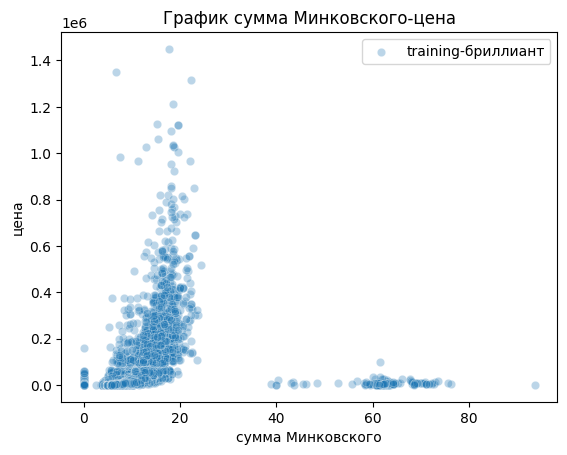

In [79]:
sns.scatterplot(x='Minkowskiy_sum', y='total_sales_price', data=train_data, label='training-бриллиант', alpha=0.3)
plt.xlabel('сумма Минковского')
plt.ylabel('цена')
plt.title('График сумма Минковского-цена')
plt.legend()
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

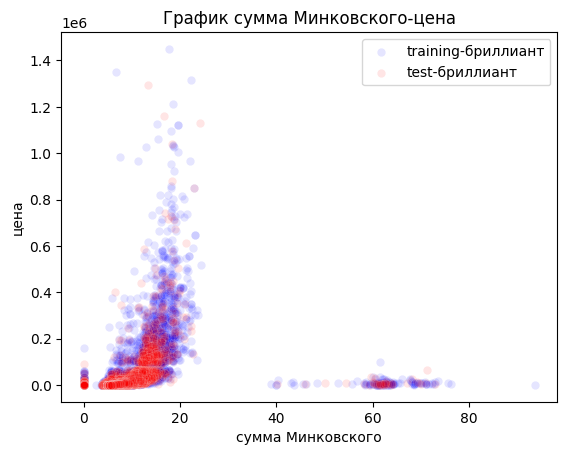

In [82]:
sns.scatterplot(x='Minkowskiy_sum', y='total_sales_price', data=train_data, label='training-бриллиант', alpha=0.1, c='blue')
sns.scatterplot(x='Minkowskiy_sum', y='total_sales_price', data=test_data, label='test-бриллиант', alpha=0.1, c='red')
plt.xlabel('сумма Минковского')
plt.ylabel('цена')
plt.title('График сумма Минковского-цена')
plt.legend()
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [84]:
distances = []
for test_point in test_data:
    point_distances = np.linalg.norm(train_data - test_point, axis=1)
    min_distance = np.min(point_distances)
    distances.append(min_distance)
distances = np.array(distances)
results = pd.DataFrame({'Diamond': test_df['Diamond'], 'Distance': distances})
print(results)

UFuncTypeError: ignored

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)